In [2]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy

You should consider upgrading via the 'c:\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np

Считаем датасет. Дропнем не нужные колонки.

In [6]:
df = pd.read_csv('api.csv')
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='reaction_null')
df.head()

,channel,text,views,date,comments,media,reaction_😢,reaction_🔥,reaction_🤨,reaction_🤡,...,tag_Роснефть,tag_ФСБ,tag_Армия,tag_Путин,tag_Спорт,tag_Интернет,tag_НАТО,tag_Цены,tag_ООН,tag_Искусственный интеллект
0,@novosti_voinaa,У Илона Маска появился 14-й ребенок. Еще одног...,52121.0,2025-03-01 11:40:08,49.0,PHOTO,0,3,4,0,...,0,0,0,0,0,0,0,0,0,1
1,@novosti_voinaa,"Восстановить бонусные карты IKEA, ZARA, LUSH и...",80479.0,2025-03-01 10:18:01,21.0,PHOTO,10,1,61,0,...,0,0,0,0,0,0,0,0,0,1
2,@novosti_voinaa,И для полноты картины минувшего и надолго запо...,148282.0,2025-03-01 00:09:40,164.0,PHOTO,94,109,36,0,...,0,0,0,0,0,0,0,0,0,1
3,@novosti_voinaa,"Видео, после которого вы начнете крепче завязы...",133541.0,2025-02-28 23:59:01,26.0,VIDEO,82,8,5,0,...,0,0,0,0,0,0,0,0,0,0
4,@novosti_voinaa,NaN,135909.0,2025-02-28 23:29:11,207.0,POLL,0,2,259,0,...,0,0,0,0,0,0,0,0,0,0


Удалим колонки в которых все поля пустые (ошибка обращения к API, непредвиденные ситуации).

In [7]:
tags = df.columns[df.columns.str.startswith("tag_")]
reactions = df.columns[df.columns.str.startswith("reaction_")]
df_cleared = df[(df["text"].str.len() > 0) & (df.views > 0) & (df[tags].fillna(0) != 0).any(axis=1) & (df[reactions].fillna(0) != 0).any(axis=1)]
df_cleared.head()

,channel,text,views,date,comments,media,reaction_😢,reaction_🔥,reaction_🤨,reaction_🤡,...,tag_Роснефть,tag_ФСБ,tag_Армия,tag_Путин,tag_Спорт,tag_Интернет,tag_НАТО,tag_Цены,tag_ООН,tag_Искусственный интеллект
0,@novosti_voinaa,У Илона Маска появился 14-й ребенок. Еще одног...,52121.0,2025-03-01 11:40:08,49.0,PHOTO,0,3,4,0,...,0,0,0,0,0,0,0,0,0,1
1,@novosti_voinaa,"Восстановить бонусные карты IKEA, ZARA, LUSH и...",80479.0,2025-03-01 10:18:01,21.0,PHOTO,10,1,61,0,...,0,0,0,0,0,0,0,0,0,1
2,@novosti_voinaa,И для полноты картины минувшего и надолго запо...,148282.0,2025-03-01 00:09:40,164.0,PHOTO,94,109,36,0,...,0,0,0,0,0,0,0,0,0,1
3,@novosti_voinaa,"Видео, после которого вы начнете крепче завязы...",133541.0,2025-02-28 23:59:01,26.0,VIDEO,82,8,5,0,...,0,0,0,0,0,0,0,0,0,0
5,@novosti_voinaa,Таких адреналиновых официальных переговоров гл...,132824.0,2025-02-28 23:08:49,148.0,PHOTO,0,17,37,0,...,0,0,0,0,0,0,0,0,0,1


Нормализуем значение просмотров, комментариев и реакций.

In [8]:
df_cleared['normalized_views'] = df_cleared.groupby('channel')['views'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0
)
df_cleared.head()

C:\Users\User\AppData\Local\Temp\ipykernel_15760\2883568583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared['normalized_views'] = df_cleared.groupby('channel')['views'].transform(


,channel,text,views,date,comments,media,reaction_😢,reaction_🔥,reaction_🤨,reaction_🤡,...,tag_ФСБ,tag_Армия,tag_Путин,tag_Спорт,tag_Интернет,tag_НАТО,tag_Цены,tag_ООН,tag_Искусственный интеллект,normalized_views
0,@novosti_voinaa,У Илона Маска появился 14-й ребенок. Еще одног...,52121.0,2025-03-01 11:40:08,49.0,PHOTO,0,3,4,0,...,0,0,0,0,0,0,0,0,1,0.000000
1,@novosti_voinaa,"Восстановить бонусные карты IKEA, ZARA, LUSH и...",80479.0,2025-03-01 10:18:01,21.0,PHOTO,10,1,61,0,...,0,0,0,0,0,0,0,0,1,0.079088
2,@novosti_voinaa,И для полноты картины минувшего и надолго запо...,148282.0,2025-03-01 00:09:40,164.0,PHOTO,94,109,36,0,...,0,0,0,0,0,0,0,0,1,0.268185
3,@novosti_voinaa,"Видео, после которого вы начнете крепче завязы...",133541.0,2025-02-28 23:59:01,26.0,VIDEO,82,8,5,0,...,0,0,0,0,0,0,0,0,0,0.227074
5,@novosti_voinaa,Таких адреналиновых официальных переговоров гл...,132824.0,2025-02-28 23:08:49,148.0,PHOTO,0,17,37,0,...,0,0,0,0,0,0,0,0,1,0.225074


In [9]:
# Проверка на то, что нормализация просмотров работает
df_cleared[df_cleared.channel == "@Novosty"].normalized_views.max() == df_cleared[df_cleared.channel == "@moscowach"].normalized_views.max()

np.True_

In [10]:
df_cleared['normalized_comments'] = df_cleared.groupby('channel')['comments'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0
)
df_cleared.head()

C:\Users\User\AppData\Local\Temp\ipykernel_15760\4107901601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared['normalized_comments'] = df_cleared.groupby('channel')['comments'].transform(


,channel,text,views,date,comments,media,reaction_😢,reaction_🔥,reaction_🤨,reaction_🤡,...,tag_Армия,tag_Путин,tag_Спорт,tag_Интернет,tag_НАТО,tag_Цены,tag_ООН,tag_Искусственный интеллект,normalized_views,normalized_comments
0,@novosti_voinaa,У Илона Маска появился 14-й ребенок. Еще одног...,52121.0,2025-03-01 11:40:08,49.0,PHOTO,0,3,4,0,...,0,0,0,0,0,0,0,1,0.000000,0.034757
1,@novosti_voinaa,"Восстановить бонусные карты IKEA, ZARA, LUSH и...",80479.0,2025-03-01 10:18:01,21.0,PHOTO,10,1,61,0,...,0,0,0,0,0,0,0,1,0.079088,0.014482
2,@novosti_voinaa,И для полноты картины минувшего и надолго запо...,148282.0,2025-03-01 00:09:40,164.0,PHOTO,94,109,36,0,...,0,0,0,0,0,0,0,1,0.268185,0.118030
3,@novosti_voinaa,"Видео, после которого вы начнете крепче завязы...",133541.0,2025-02-28 23:59:01,26.0,VIDEO,82,8,5,0,...,0,0,0,0,0,0,0,0,0.227074,0.018103
5,@novosti_voinaa,Таких адреналиновых официальных переговоров гл...,132824.0,2025-02-28 23:08:49,148.0,PHOTO,0,17,37,0,...,0,0,0,0,0,0,0,1,0.225074,0.106445


In [11]:
# Проверка на то, что нормализация комментариев работает
df_cleared[df_cleared.channel == "@Novosty"].normalized_views.max() == df_cleared[df_cleared.channel == "@moscowach"].normalized_views.max()

np.True_

In [12]:
sum_reactions = df_cleared[reactions].sum(axis=1)
df_cleared[reactions] = df_cleared[reactions].div(sum_reactions, axis=0) * 100
df_cleared[reactions] = df_cleared[reactions].fillna(0)
df_cleared[reactions].head()

C:\Users\User\AppData\Local\Temp\ipykernel_15760\1293883178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared[reactions] = df_cleared[reactions].div(sum_reactions, axis=0) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_15760\1293883178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared[reactions] = df_cleared[reactions].fillna(0)


,reaction_😢,reaction_🔥,reaction_🤨,reaction_🤡,reaction_🕊,reaction_🎉,reaction_🤣,reaction_😱,reaction_👍,reaction_👎,reaction_❤,reaction_💯,reaction_😁,reaction_🤔,reaction_🤬,reaction_🤯,reaction_🙏
0,0.000000,0.508475,0.677966,0.0,0.0,0.0,0.0,0.0,52.881356,4.237288,3.559322,0.0,31.525424,0.0,1.016949,5.593220,0.0
1,2.178649,0.217865,13.289760,0.0,0.0,0.0,0.0,0.0,47.712418,3.267974,4.575163,0.0,12.418301,0.0,7.625272,8.714597,0.0
2,4.669647,5.414804,1.788376,0.0,0.0,0.0,0.0,0.0,11.823150,1.639344,3.030303,0.0,18.479881,0.0,0.347740,52.806756,0.0
3,7.564576,0.738007,0.461255,0.0,0.0,0.0,0.0,0.0,12.177122,0.645756,3.690037,0.0,0.830258,0.0,0.000000,73.892989,0.0
5,0.000000,1.249082,2.718589,0.0,0.0,0.0,0.0,0.0,25.789860,1.763409,6.980162,0.0,16.458486,0.0,0.514328,44.526084,0.0


In [13]:
df_cleared.head()

,channel,text,views,date,comments,media,reaction_😢,reaction_🔥,reaction_🤨,reaction_🤡,...,tag_Армия,tag_Путин,tag_Спорт,tag_Интернет,tag_НАТО,tag_Цены,tag_ООН,tag_Искусственный интеллект,normalized_views,normalized_comments
0,@novosti_voinaa,У Илона Маска появился 14-й ребенок. Еще одног...,52121.0,2025-03-01 11:40:08,49.0,PHOTO,0.000000,0.508475,0.677966,0.0,...,0,0,0,0,0,0,0,1,0.000000,0.034757
1,@novosti_voinaa,"Восстановить бонусные карты IKEA, ZARA, LUSH и...",80479.0,2025-03-01 10:18:01,21.0,PHOTO,2.178649,0.217865,13.289760,0.0,...,0,0,0,0,0,0,0,1,0.079088,0.014482
2,@novosti_voinaa,И для полноты картины минувшего и надолго запо...,148282.0,2025-03-01 00:09:40,164.0,PHOTO,4.669647,5.414804,1.788376,0.0,...,0,0,0,0,0,0,0,1,0.268185,0.118030
3,@novosti_voinaa,"Видео, после которого вы начнете крепче завязы...",133541.0,2025-02-28 23:59:01,26.0,VIDEO,7.564576,0.738007,0.461255,0.0,...,0,0,0,0,0,0,0,0,0.227074,0.018103
5,@novosti_voinaa,Таких адреналиновых официальных переговоров гл...,132824.0,2025-02-28 23:08:49,148.0,PHOTO,0.000000,1.249082,2.718589,0.0,...,0,0,0,0,0,0,0,1,0.225074,0.106445


In [14]:
df_prepared = df_cleared.drop(columns='views')
df_prepared = df_prepared.drop(columns='comments')
df_prepared.head()

,channel,text,date,media,reaction_😢,reaction_🔥,reaction_🤨,reaction_🤡,reaction_🕊,reaction_🎉,...,tag_Армия,tag_Путин,tag_Спорт,tag_Интернет,tag_НАТО,tag_Цены,tag_ООН,tag_Искусственный интеллект,normalized_views,normalized_comments
0,@novosti_voinaa,У Илона Маска появился 14-й ребенок. Еще одног...,2025-03-01 11:40:08,PHOTO,0.000000,0.508475,0.677966,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0.000000,0.034757
1,@novosti_voinaa,"Восстановить бонусные карты IKEA, ZARA, LUSH и...",2025-03-01 10:18:01,PHOTO,2.178649,0.217865,13.289760,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0.079088,0.014482
2,@novosti_voinaa,И для полноты картины минувшего и надолго запо...,2025-03-01 00:09:40,PHOTO,4.669647,5.414804,1.788376,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0.268185,0.118030
3,@novosti_voinaa,"Видео, после которого вы начнете крепче завязы...",2025-02-28 23:59:01,VIDEO,7.564576,0.738007,0.461255,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.227074,0.018103
5,@novosti_voinaa,Таких адреналиновых официальных переговоров гл...,2025-02-28 23:08:49,PHOTO,0.000000,1.249082,2.718589,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0.225074,0.106445


Распределение реакций по всем постам.

In [17]:
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
  Using cached fonttools-4.56.0-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'c:\\Python\\Python310\\Lib\\site-packages\\fontTools\\ttLib\\tables\\_v_m_t_x.py'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'c:\\Python\\Python310\\Lib\\site-packages\\matplotlib\\axis.py'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [35]:
import matplotlib
a = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
b = [i for i in a if 'emoji' in i.lower()]
print("Доступные шрифты:", b)

Доступные шрифты: ['Segoe UI Emoji']


C:\Users\User\AppData\Local\Temp\ipykernel_15760\633447929.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


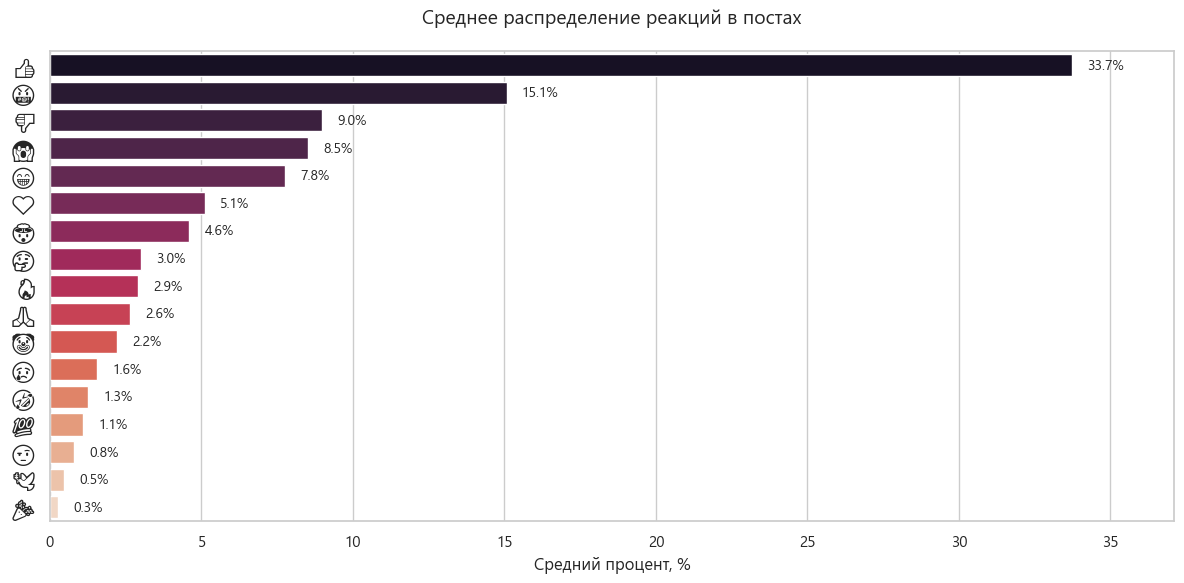

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Настройка основного шрифта для всего текста
plt.rcParams['font.family'] = 'Segoe UI'
plt.rcParams['font.size'] = 12

emoji_font = {'fontname': 'Segoe UI Emoji'}

mean_reactions = df_prepared[reactions].mean().sort_values(ascending=False)
mean_df = pd.DataFrame({
    'reaction': mean_reactions.index.str.replace('reaction_', ''),
    'mean_percent': mean_reactions.values
})

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='mean_percent',
    y='reaction',
    data=mean_df,
    palette="rocket",
    orient='h'
)

# Настройка подписей с эмодзи
for label in barplot.get_yticklabels():
    label.set_fontproperties(mpl.font_manager.FontProperties(family='Segoe UI Emoji'))
    label.set_fontsize(14)

plt.title('Среднее распределение реакций в постах', pad=20, fontsize=14)
plt.xlabel('Средний процент, %', fontsize=12)
plt.ylabel('')

plt.xlim(0, mean_df['mean_percent'].max() * 1.1)

for i, (name, value) in enumerate(zip(mean_df['reaction'], mean_df['mean_percent'])):
    plt.text(value + 0.5, i, f'{value:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Распределение тэгов

C:\Users\User\AppData\Local\Temp\ipykernel_15760\2186804413.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


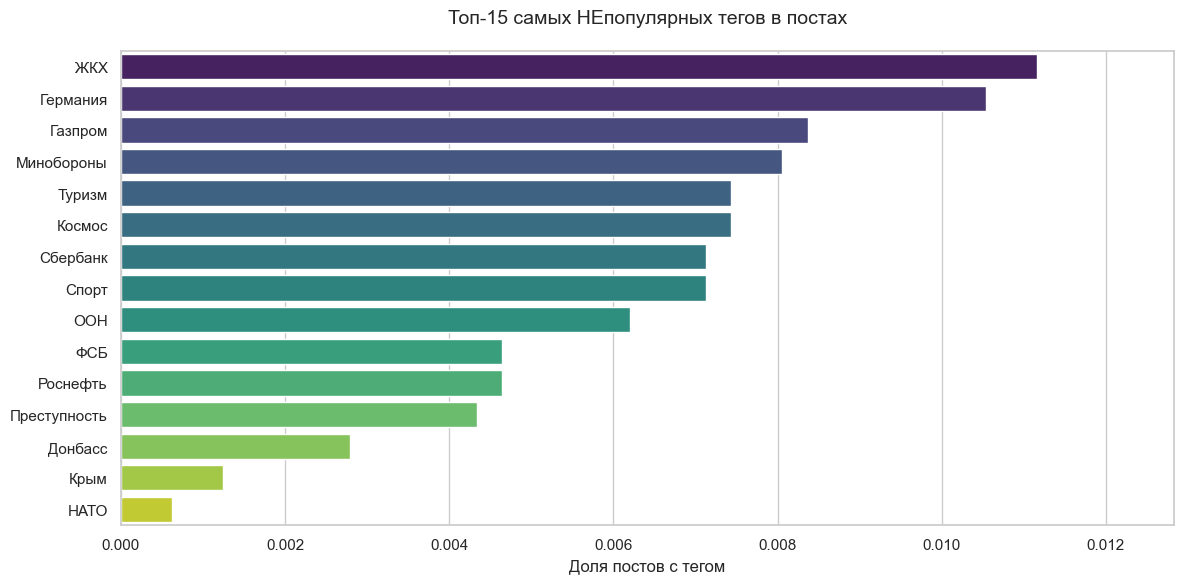

In [ ]:
tag_means = df_prepared[tags].mean().sort_values(ascending=False)

tag_df = pd.DataFrame({
    'tag': tag_means.index.str.replace('tag_', ''),
    'frequency': tag_means.values
}).tail(15)  # Топ-15 тегов

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

barplot = sns.barplot(
    x='frequency',
    y='tag',
    data=tag_df,
    palette="viridis",
    orient='h'
)

plt.title('Топ-15 самых НЕпопулярных тегов в постах', fontsize=14)
plt.xlabel('Доля постов с тегом', fontsize=12)
plt.ylabel('')
plt.xlim(0, tag_df['frequency'].max() * 1.15)

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15760\3151699851.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


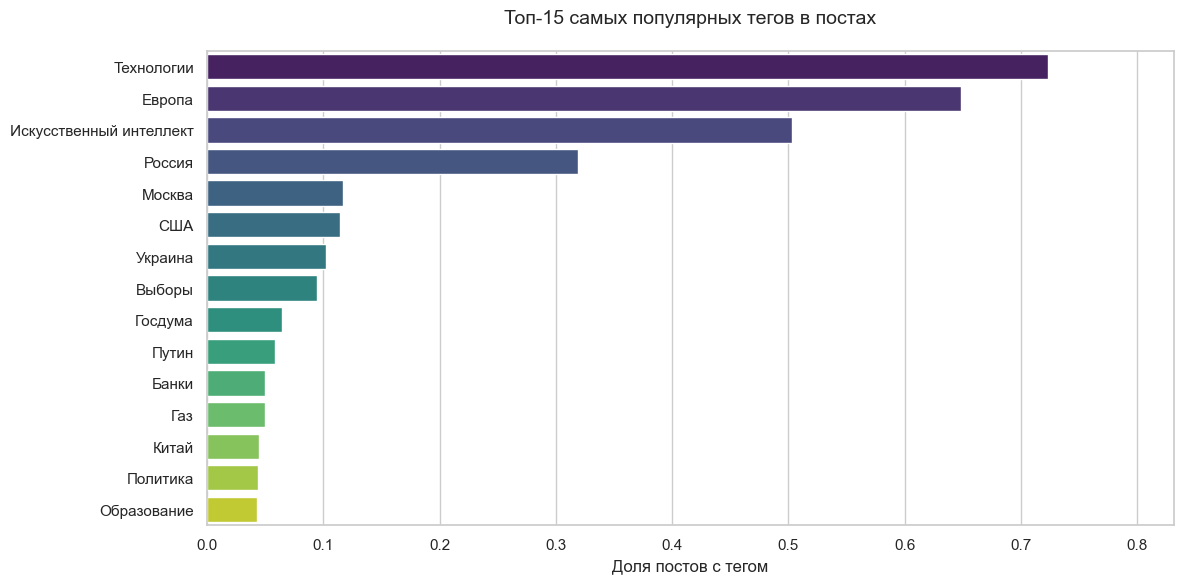

In [ ]:
tag_means = df_prepared[tags].mean().sort_values(ascending=False)

tag_df = pd.DataFrame({
    'tag': tag_means.index.str.replace('tag_', ''),
    'frequency': tag_means.values
}).head(15)  # Топ-15 тегов

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

barplot = sns.barplot(
    x='frequency',
    y='tag',
    data=tag_df,
    palette="viridis",
    orient='h'
)

plt.title('Топ-15 самых популярных тегов в постах', fontsize=14)
plt.xlabel('Доля постов с тегом', fontsize=12)
plt.ylabel('')
plt.xlim(0, tag_df['frequency'].max() * 1.15)

plt.tight_layout()
plt.show()

Среднее количество комментариев в зависимости от тэгов

C:\Users\User\AppData\Local\Temp\ipykernel_15760\891164540.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


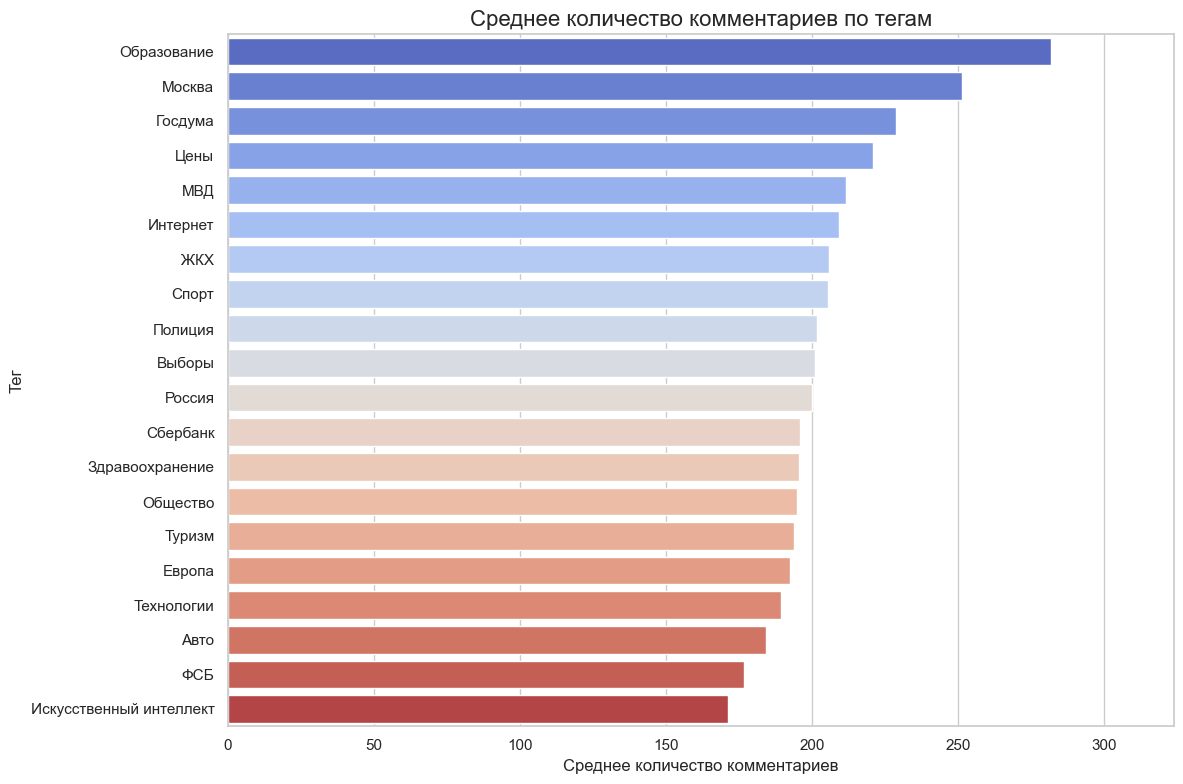

In [56]:

# Расчет среднего количества комментариев по тегам
tag_stats = []
for tag in tags:
    mask = df[tag] == 1
    if mask.sum() > 0:  # Игнорируем теги без постов
        mean_comments = df.loc[mask, "comments"].mean()
        tag_stats.append({
            'tag': tag.replace('tag_', ''),
            'mean_comments': mean_comments,
            'post_count': mask.sum()
        })

stats_df = pd.DataFrame(tag_stats)
stats_df = stats_df[stats_df['post_count'] > 5]  # Минимум 5 постов с тегом
stats_df = stats_df.sort_values('mean_comments', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

barplot = sns.barplot(
    x='mean_comments',
    y='tag',
    data=stats_df,
    palette="coolwarm",
    orient='h'
)

plt.title('Среднее количество комментариев по тегам', fontsize=16)
plt.xlabel('Среднее количество комментариев', fontsize=12)
plt.ylabel('Тег', fontsize=12)
plt.xlim(0, stats_df['mean_comments'].max() * 1.15)


plt.tight_layout()
plt.show()

Завосомость количества комментариев от количества и типа реакций

C:\Users\User\AppData\Local\Temp\ipykernel_15760\3150091496.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


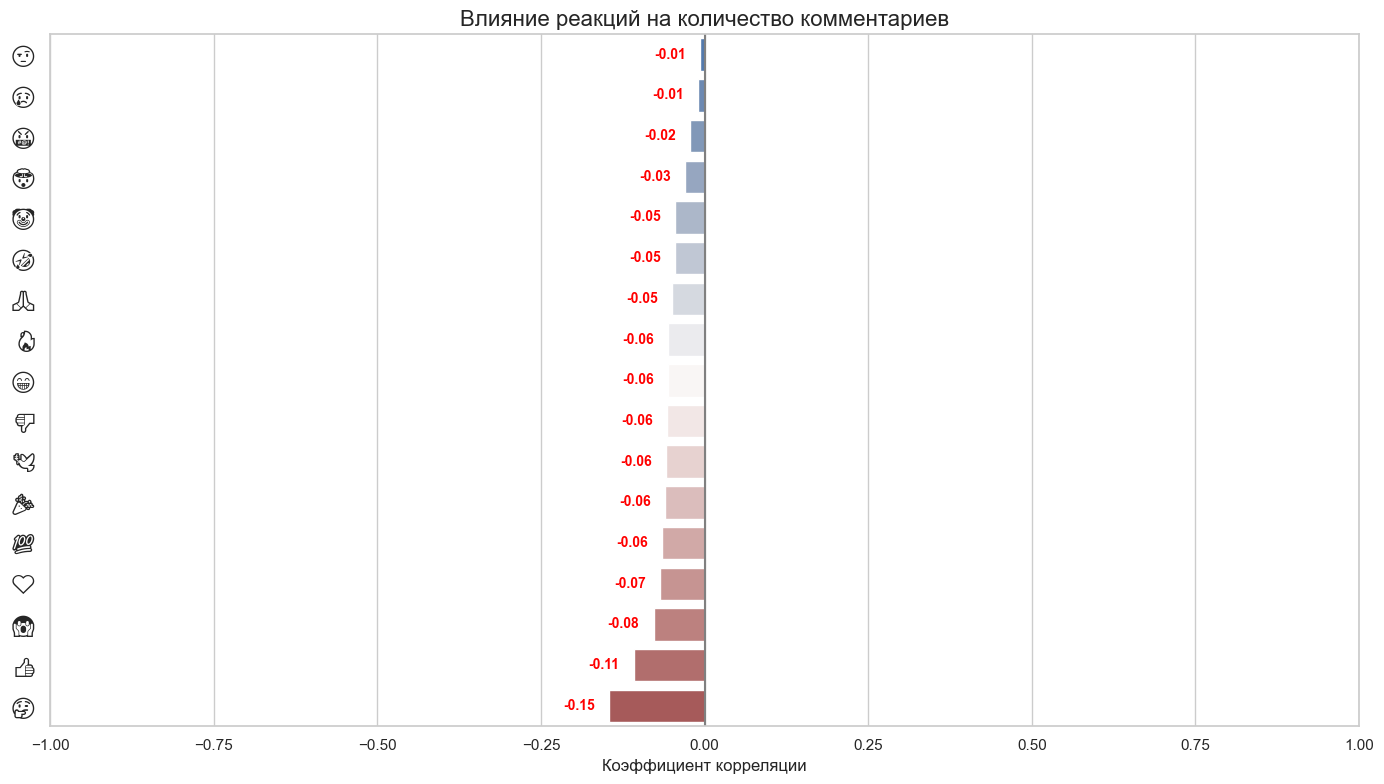

In [72]:
# Настройки визуализации
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# 2. Расчет корреляции между реакциями и комментариями
correlations = df[reactions].corrwith(df["comments"]).sort_values(ascending=False)

# 3. Создание DataFrame для визуализации
corr_df = pd.DataFrame({
    'reaction': correlations.index.str.replace('reaction_', ''),
    'correlation': correlations.values
})

# 4. Построение графика
barplot = sns.barplot(
    x='correlation',
    y='reaction',
    data=corr_df,
    palette="vlag",  # Дивергентная палитра для отрицательных/положительных значений
    orient='h'
)

# 5. Настройка оформления
plt.title('Влияние реакций на количество комментариев', fontsize=16)
plt.xlabel('Коэффициент корреляции', fontsize=12)
plt.ylabel('')
plt.xlim(-1, 1)

# Настройка подписей с эмодзи
for label in barplot.get_yticklabels():
    label.set_fontproperties(mpl.font_manager.FontProperties(family='Segoe UI Emoji'))
    label.set_fontsize(14)
    
# 6. Добавление аннотаций
for i, (reaction, corr) in enumerate(zip(corr_df['reaction'], corr_df['correlation'])):
    color = 'red' if corr < 0 else 'green'
    plt.text(
        corr + (0.03 if corr > 0 else -0.07),
        i,
        f'{corr:.2f}',
        va='center',
        color=color,
        fontsize=10,
        fontweight='bold'
    )

plt.axvline(0, color='gray')
plt.tight_layout()
plt.show()

Зависимость просмотров от времени

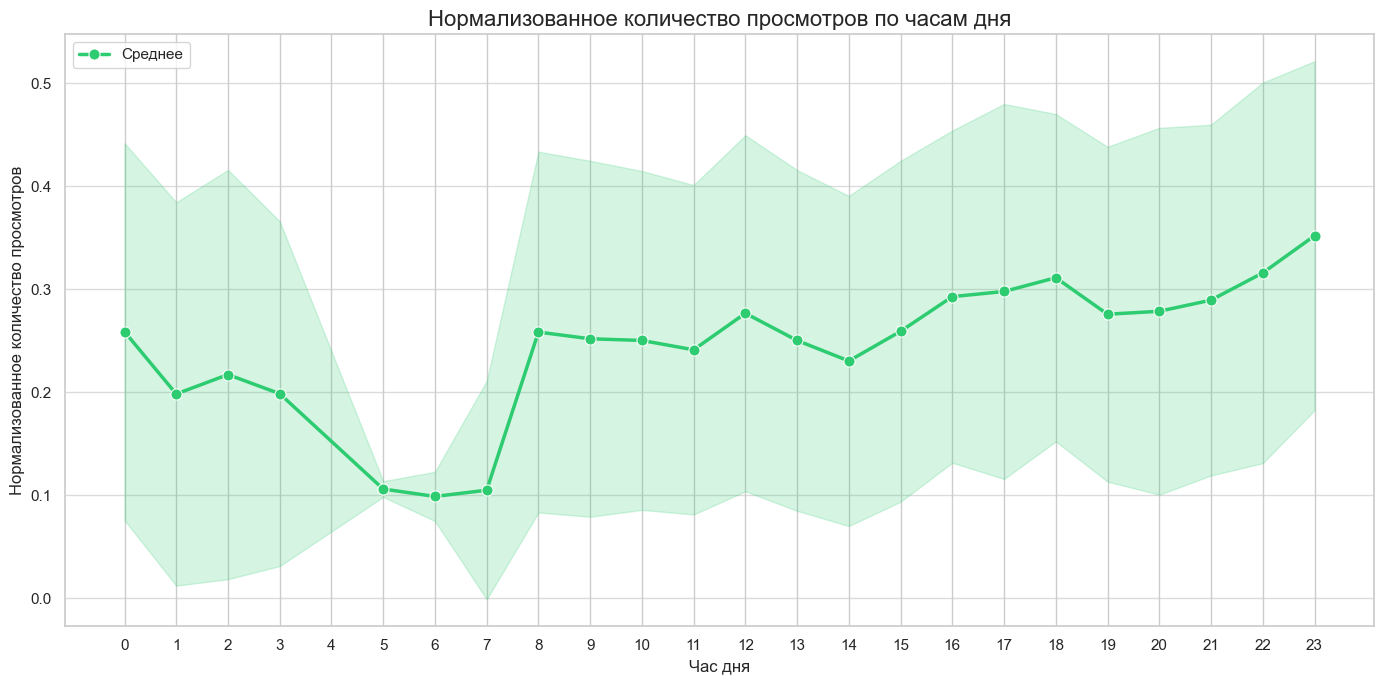

In [71]:
df_prepared['date'] = pd.to_datetime(df_prepared['date'], format='%Y-%m-%d %H:%M:%S')
df_prepared['hour'] = df_prepared['date'].dt.hour

# 3. Группировка по часам и расчет статистик
hourly_stats = df_prepared.groupby('hour')['normalized_views'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.lineplot(
    x='hour',
    y='mean',
    data=hourly_stats,
    marker='o',
    color='#2ecc71',
    linewidth=2.5,
    markersize=8,
    label='Среднее'
)

# Заполнение области +1/-1 стандартное отклонение
plt.fill_between(
    hourly_stats['hour'],
    hourly_stats['mean'] - hourly_stats['std'],
    hourly_stats['mean'] + hourly_stats['std'],
    color='#2ecc71',
    alpha=0.2
)

plt.title('Нормализованное количество просмотров по часам дня', fontsize=16)
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Нормализованное количество просмотров', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()


Зависимость количества просмотров от тэгов

C:\Users\User\AppData\Local\Temp\ipykernel_15760\3497157251.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


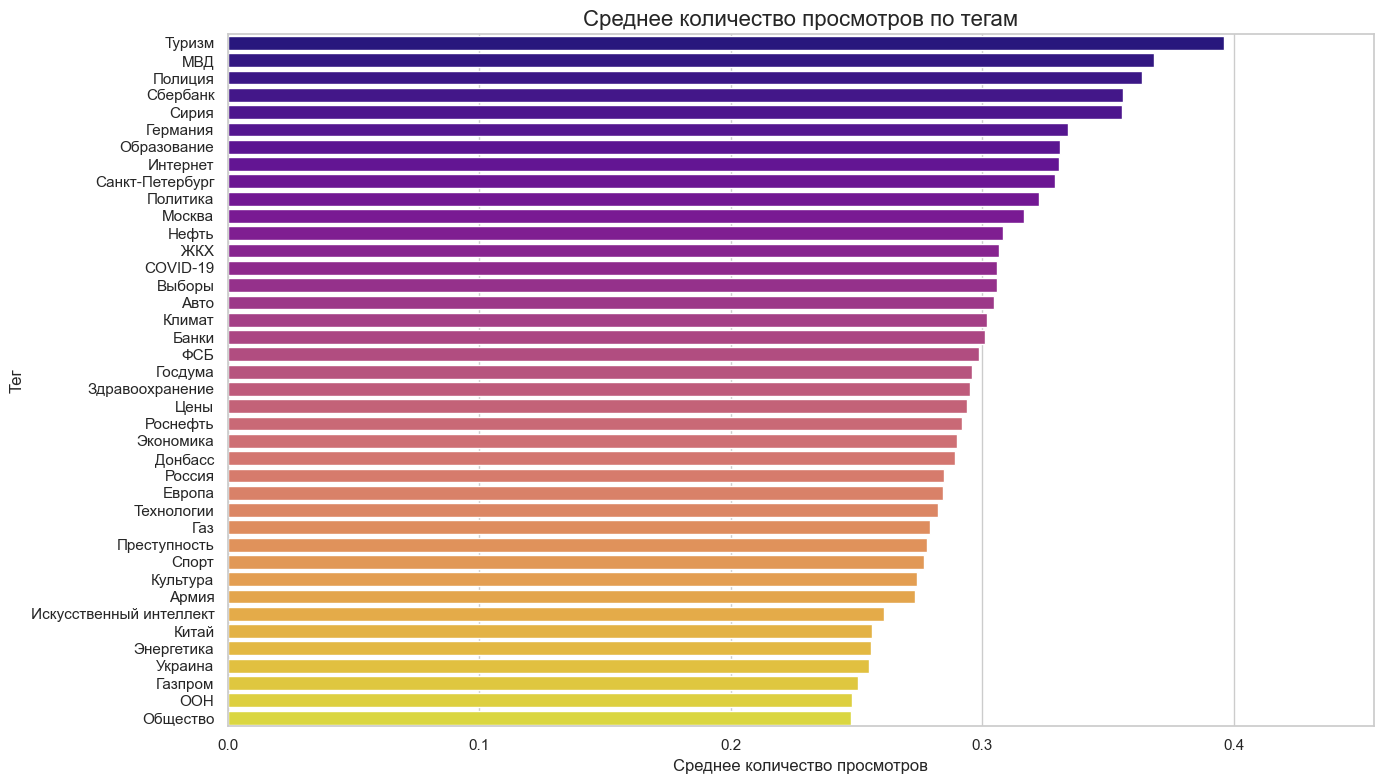

In [76]:
tag_stats = []
for tag in tags:
    mask = df_prepared[tag] == 1
    if mask.sum() > 0:  # Игнорируем теги без постов
        mean_views = df_prepared.loc[mask, "normalized_views"].mean()
        tag_stats.append({
            'tag': tag.replace('tag_', ''),
            'mean_views': mean_views,
            'post_count': mask.sum()
        })

stats_df = pd.DataFrame(tag_stats)
stats_df = stats_df[stats_df['post_count'] >= 5]  # Теги с минимум 5 постами
stats_df = stats_df.sort_values('mean_views', ascending=False).head(40)

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

barplot = sns.barplot(
    x='mean_views',
    y='tag',
    data=stats_df,
    palette="plasma",
    orient='h'
)

plt.title('Среднее количество просмотров по тегам', fontsize=16)
plt.xlabel('Среднее количество просмотров', fontsize=12)
plt.ylabel('Тег', fontsize=12)
plt.xlim(0, stats_df['mean_views'].max() * 1.15)

plt.tight_layout()
plt.show()